In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import linear_model, metrics, model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [31]:
df_prod_fin = pd.read_csv("Datos Producción Final")
df_prod_fin

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,23019,1,0.0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.3,91.2,184000000.0,17825,0.0,0.0,1747.9,6.0
1,23020,1,0.0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.8,91.2,182000000.0,14246,0.0,0.0,1676.2,6.6
2,23021,1,0.0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.2,86.4,248000000.0,17825,0.0,0.0,1928.5,8.1
3,23022,1,0.0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.5,83.2,230000000.0,12912,0.0,0.0,1782.8,5.9
4,23023,1,0.0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.1,74.4,133000000.0,17825,26.6,20.9,1861.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0.0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,19.0,73.0,165000000.0,12912,31.0,17.0,1342.8,4.9
148,24050,1,0.0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,18.0,68.0,152000000.0,6379,29.0,27.0,1422.8,3.7
149,24051,1,0.0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,18.0,81.0,161000000.0,12912,33.0,19.0,1486.6,5.5
150,24052,2,24050.0,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.0,69.0,148000000.0,14246,24.0,18.0,1857.3,6.0


In [119]:
df_prod_fin["Fecha/hora inicio"] = pd.to_datetime(df_prod_fin["Fecha/hora inicio"])
df_prod_fin["Fecha/hora fin"] = pd.to_datetime(df_prod_fin["Fecha/hora fin"])


In [121]:
df_prod_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          152 non-null    int64         
 1   Orden en el encadenado        152 non-null    int64         
 2   LOTE parental                 152 non-null    float64       
 3   ID Bioreactor                 152 non-null    int64         
 4   Fecha/hora inicio             152 non-null    datetime64[ns]
 5   Fecha/hora fin                152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  152 non-null    float64       
 7   Turbidez inicio cultivo       152 non-null    float64       
 8   Turbidez fin cultivo          152 non-null    float64       
 9   Viabilidad final cultivo      152 non-null    float64       
 10  ID Centrífuga                 152 non-null    int64         
 11  Centrifugación 1 turbidez     15

In [122]:
df_cin_fin = pd.read_csv("Datos Cineticos Cultivo Final")
df_cin_fin

,Lote,Fecha,Turbidez,Viabilidad,Glucosa g/L
0,23019,2023-03-21 07:30:00,17.28,8330000.0,1.740
1,23019,2023-03-21 11:00:00,17.28,14000000.0,1.970
2,23019,2023-03-21 14:00:00,18.40,16900000.0,1.920
3,23019,2023-03-21 18:00:00,19.76,24700000.0,1.880
4,23019,2023-03-22 07:00:00,39.12,100000000.0,1.570
...,...,...,...,...,...
1836,24110,2024-07-04 15:30:00,58.40,80500000.0,1.584
1837,24110,2024-07-04 19:30:00,69.76,102000000.0,1.248
1838,24110,2024-07-05 06:30:00,100.80,153000000.0,0.600
1839,24110,2024-07-05 08:00:00,104.80,151000000.0,0.520


In [123]:
df_cin_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Lote         1841 non-null   int64  
 1   Fecha        1840 non-null   object 
 2   Turbidez     1831 non-null   float64
 3   Viabilidad   1839 non-null   float64
 4   Glucosa g/L  1522 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 72.0+ KB


In [124]:
# import pandas as pd

# Supongamos que 'df' es el DataFrame que contiene tu tabla
# df['Fecha'] = pd.to_datetime(df['Fecha'])  # Asegúrate de que la columna Fecha sea de tipo datetime

# Crear las nuevas columnas para los valores iniciales y finales de glucosa
df_cin_fin['Glucosa inicial'] = df_cin_fin.groupby('Lote')['Glucosa g/L'].transform('first')
df_cin_fin['Glucosa final'] = df_cin_fin.groupby('Lote')['Glucosa g/L'].transform('last')

# Mostrar el resultado
df_cin_fin


,Lote,Fecha,Turbidez,Viabilidad,Glucosa g/L,Glucosa inicial,Glucosa final
0,23019,2023-03-21 07:30:00,17.28,8330000.0,1.740,1.740,0.210
1,23019,2023-03-21 11:00:00,17.28,14000000.0,1.970,1.740,0.210
2,23019,2023-03-21 14:00:00,18.40,16900000.0,1.920,1.740,0.210
3,23019,2023-03-21 18:00:00,19.76,24700000.0,1.880,1.740,0.210
4,23019,2023-03-22 07:00:00,39.12,100000000.0,1.570,1.740,0.210
...,...,...,...,...,...,...,...
1836,24110,2024-07-04 15:30:00,58.40,80500000.0,1.584,1.792,0.592
1837,24110,2024-07-04 19:30:00,69.76,102000000.0,1.248,1.792,0.592
1838,24110,2024-07-05 06:30:00,100.80,153000000.0,0.600,1.792,0.592
1839,24110,2024-07-05 08:00:00,104.80,151000000.0,0.520,1.792,0.592


In [125]:
df_cin_fin = df_cin_fin.drop_duplicates(subset='Lote')
df_cin_fin

,Lote,Fecha,Turbidez,Viabilidad,Glucosa g/L,Glucosa inicial,Glucosa final
0,23019,2023-03-21 07:30:00,17.28,8330000.0,1.740,1.740,0.210
10,23020,2023-03-21 07:30:00,18.80,7460000.0,1.750,1.750,0.310
20,23021,2023-03-22 07:30:00,16.16,8910000.0,1.730,1.730,0.280
31,23022,2023-03-22 07:30:00,18.48,7850000.0,1.730,1.730,0.370
42,23023,2023-03-28 08:00:00,17.12,5800000.0,1.800,1.800,0.460
...,...,...,...,...,...,...,...
1812,24104,2024-07-03 20:00:00,59.12,75700000.0,1.552,1.552,0.816
1815,24106,2024-07-01 13:15:00,23.60,10000000.0,1.944,1.944,0.560
1819,24107,2024-07-01 14:00:00,21.76,10400000.0,1.816,1.816,0.584
1823,24109,2024-07-03 16:00:00,23.84,15100000.0,1.832,1.832,0.440


In [126]:
df_prod_fin_cin_fin = pd.merge(df_prod_fin, df_cin_fin, left_on="LOTE",right_on="Lote", how="left")
df_prod_fin_cin_fin = df_prod_fin_cin_fin.drop(["Lote","Fecha","Turbidez","Viabilidad"],axis=1)
df_prod_fin_cin_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          152 non-null    int64         
 1   Orden en el encadenado        152 non-null    int64         
 2   LOTE parental                 152 non-null    float64       
 3   ID Bioreactor                 152 non-null    int64         
 4   Fecha/hora inicio             152 non-null    datetime64[ns]
 5   Fecha/hora fin                152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  152 non-null    float64       
 7   Turbidez inicio cultivo       152 non-null    float64       
 8   Turbidez fin cultivo          152 non-null    float64       
 9   Viabilidad final cultivo      152 non-null    float64       
 10  ID Centrífuga                 152 non-null    int64         
 11  Centrifugación 1 turbidez     15

In [127]:
df_prod_fin_cin_fin

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Glucosa g/L,Glucosa inicial,Glucosa final
0,23019,1,0.0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.3,91.2,184000000.0,17825,0.0,0.0,1747.9,6.0,1.740,1.740,0.210
1,23020,1,0.0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.8,91.2,182000000.0,14246,0.0,0.0,1676.2,6.6,1.750,1.750,0.310
2,23021,1,0.0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.2,86.4,248000000.0,17825,0.0,0.0,1928.5,8.1,1.730,1.730,0.280
3,23022,1,0.0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.5,83.2,230000000.0,12912,0.0,0.0,1782.8,5.9,1.730,1.730,0.370
4,23023,1,0.0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.1,74.4,133000000.0,17825,26.6,20.9,1861.8,3.0,1.800,1.800,0.460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0.0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,19.0,73.0,165000000.0,12912,31.0,17.0,1342.8,4.9,1.704,1.704,0.808
148,24050,1,0.0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,18.0,68.0,152000000.0,6379,29.0,27.0,1422.8,3.7,1.880,1.880,0.928
149,24051,1,0.0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,18.0,81.0,161000000.0,12912,33.0,19.0,1486.6,5.5,1.512,1.512,0.720
150,24052,2,24050.0,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.0,69.0,148000000.0,14246,24.0,18.0,1857.3,6.0,1.880,1.880,1.144


In [128]:
df_cin_ino = pd.read_csv("Datos Cineticos Inoculo")
df_cin_ino

,Lote,Fecha,Turbidez,Viabilidad
0,23019,2023-03-21 06:30:00,32.8,134000000.0
1,23020,2023-03-21 06:30:00,32.8,134000000.0
2,23021,2023-03-22 06:30:00,27.8,115000000.0
3,23022,2023-03-22 06:30:00,27.8,115000000.0
4,23023,2023-03-27 07:30:00,18.2,10900000.0
...,...,...,...,...
705,24111,2024-07-06 06:15:00,27.6,80400000.0
706,24111,2024-07-06 07:00:00,28.1,92800000.0
707,24108,2024-07-05 07:15:00,17.5,2170000.0
708,24108,2024-07-06 06:15:00,27.6,80400000.0


In [129]:
df_cin_ino['Turbidez inóculo inicial'] = df_cin_ino.groupby('Lote')['Turbidez'].transform('first')
df_cin_ino['Turbidez inóculo final'] = df_cin_ino.groupby('Lote')['Turbidez'].transform('last')
df_cin_ino = df_cin_ino.drop_duplicates(subset="Lote")
df_cin_ino.info()


<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 0 to 707
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Lote                      169 non-null    int64  
 1   Fecha                     169 non-null    object 
 2   Turbidez                  169 non-null    float64
 3   Viabilidad                169 non-null    float64
 4   Turbidez inóculo inicial  169 non-null    float64
 5   Turbidez inóculo final    169 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.2+ KB


In [190]:
df_prod_fin_cin_fin_cin_ino = pd.merge(df_prod_fin_cin_fin, df_cin_ino, left_on="LOTE",right_on="Lote", how='left')
df_prod_fin_cin_fin_cin_ino.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          152 non-null    int64         
 1   Orden en el encadenado        152 non-null    int64         
 2   LOTE parental                 152 non-null    float64       
 3   ID Bioreactor                 152 non-null    int64         
 4   Fecha/hora inicio             152 non-null    datetime64[ns]
 5   Fecha/hora fin                152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  152 non-null    float64       
 7   Turbidez inicio cultivo       152 non-null    float64       
 8   Turbidez fin cultivo          152 non-null    float64       
 9   Viabilidad final cultivo      152 non-null    float64       
 10  ID Centrífuga                 152 non-null    int64         
 11  Centrifugación 1 turbidez     15

In [191]:
df_prod_fin_cin_fin_cin_ino = df_prod_fin_cin_fin_cin_ino.drop(["Lote","Fecha","Viabilidad","Turbidez"],axis="columns")
df_prod_fin_cin_fin_cin_ino

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Glucosa g/L,Glucosa inicial,Glucosa final,Turbidez inóculo inicial,Turbidez inóculo final
0,23019,1,0.0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.3,91.2,184000000.0,17825,0.0,0.0,1747.9,6.0,1.740,1.740,0.210,32.8,32.8
1,23020,1,0.0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.8,91.2,182000000.0,14246,0.0,0.0,1676.2,6.6,1.750,1.750,0.310,32.8,32.8
2,23021,1,0.0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.2,86.4,248000000.0,17825,0.0,0.0,1928.5,8.1,1.730,1.730,0.280,27.8,27.8
3,23022,1,0.0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.5,83.2,230000000.0,12912,0.0,0.0,1782.8,5.9,1.730,1.730,0.370,27.8,27.8
4,23023,1,0.0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.1,74.4,133000000.0,17825,26.6,20.9,1861.8,3.0,1.800,1.800,0.460,18.2,31.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0.0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,19.0,73.0,165000000.0,12912,31.0,17.0,1342.8,4.9,1.704,1.704,0.808,14.8,25.3
148,24050,1,0.0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,18.0,68.0,152000000.0,6379,29.0,27.0,1422.8,3.7,1.880,1.880,0.928,14.7,25.9
149,24051,1,0.0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,18.0,81.0,161000000.0,12912,33.0,19.0,1486.6,5.5,1.512,1.512,0.720,14.7,25.9
150,24052,2,24050.0,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.0,69.0,148000000.0,14246,24.0,18.0,1857.3,6.0,1.880,1.880,1.144,NaN,NaN


In [192]:
df_prod_fin_cin_fin_cin_ino = df_prod_fin_cin_fin_cin_ino.rename(columns={"Turbidez": "Turbidez Inóculo Cinéticos"})
df_prod_fin_cin_fin_cin_ino

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Glucosa g/L,Glucosa inicial,Glucosa final,Turbidez inóculo inicial,Turbidez inóculo final
0,23019,1,0.0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.3,91.2,184000000.0,17825,0.0,0.0,1747.9,6.0,1.740,1.740,0.210,32.8,32.8
1,23020,1,0.0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.8,91.2,182000000.0,14246,0.0,0.0,1676.2,6.6,1.750,1.750,0.310,32.8,32.8
2,23021,1,0.0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.2,86.4,248000000.0,17825,0.0,0.0,1928.5,8.1,1.730,1.730,0.280,27.8,27.8
3,23022,1,0.0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.5,83.2,230000000.0,12912,0.0,0.0,1782.8,5.9,1.730,1.730,0.370,27.8,27.8
4,23023,1,0.0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.1,74.4,133000000.0,17825,26.6,20.9,1861.8,3.0,1.800,1.800,0.460,18.2,31.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0.0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,19.0,73.0,165000000.0,12912,31.0,17.0,1342.8,4.9,1.704,1.704,0.808,14.8,25.3
148,24050,1,0.0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,18.0,68.0,152000000.0,6379,29.0,27.0,1422.8,3.7,1.880,1.880,0.928,14.7,25.9
149,24051,1,0.0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,18.0,81.0,161000000.0,12912,33.0,19.0,1486.6,5.5,1.512,1.512,0.720,14.7,25.9
150,24052,2,24050.0,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.0,69.0,148000000.0,14246,24.0,18.0,1857.3,6.0,1.880,1.880,1.144,NaN,NaN


In [138]:
df_prei_train = pd.read_csv("Datos cultivos productivos\df_prei_train.csv")
df_prei_train = df_prei_train[["LOTE","Turbidez linea 1","Turbidez linea 2","Turbidez linea 3","PH menor 1","PH menor 2"]]
df_prei_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LOTE              164 non-null    int64  
 1   Turbidez linea 1  162 non-null    float64
 2   Turbidez linea 2  151 non-null    float64
 3   Turbidez linea 3  134 non-null    float64
 4   PH menor 1        161 non-null    float64
 5   PH menor 2        161 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 7.8 KB


In [151]:
df_prod_fin_cin_fin_cin_ino_prei_train = pd.merge(df_prod_fin_cin_fin_cin_ino, df_prei_train, left_on="LOTE",right_on="LOTE", how='left')
df_prod_fin_cin_fin_cin_ino_prei_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          153 non-null    int64         
 1   Orden en el encadenado        153 non-null    int64         
 2   LOTE parental                 153 non-null    float64       
 3   ID Bioreactor                 153 non-null    int64         
 4   Fecha/hora inicio             153 non-null    datetime64[ns]
 5   Fecha/hora fin                153 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  153 non-null    float64       
 7   Turbidez inicio cultivo       153 non-null    float64       
 8   Turbidez fin cultivo          153 non-null    float64       
 9   Viabilidad final cultivo      153 non-null    float64       
 10  ID Centrífuga                 153 non-null    int64         
 11  Centrifugación 1 turbidez     15

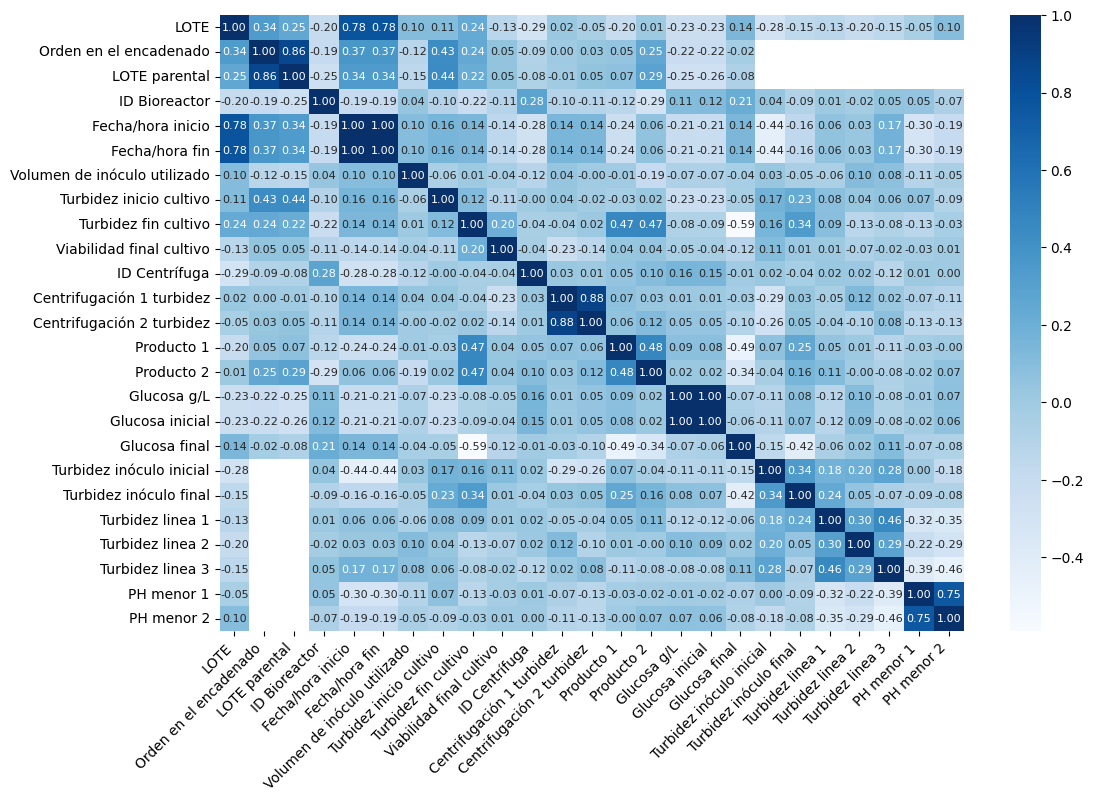

In [152]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Generar el heatmap
sns.heatmap(df_prod_fin_cin_fin_cin_ino_prei_train.corr(), annot=True, annot_kws={"size": 8}, fmt=".2f", cmap="Blues")

# Rotar las etiquetas del eje X para que no se sobrepongan
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.show()

In [153]:
df_prod_fin_cin_fin_cin_ino_prei_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          153 non-null    int64         
 1   Orden en el encadenado        153 non-null    int64         
 2   LOTE parental                 153 non-null    float64       
 3   ID Bioreactor                 153 non-null    int64         
 4   Fecha/hora inicio             153 non-null    datetime64[ns]
 5   Fecha/hora fin                153 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  153 non-null    float64       
 7   Turbidez inicio cultivo       153 non-null    float64       
 8   Turbidez fin cultivo          153 non-null    float64       
 9   Viabilidad final cultivo      153 non-null    float64       
 10  ID Centrífuga                 153 non-null    int64         
 11  Centrifugación 1 turbidez     15

In [ ]:
df_prod_fin_cin_fin_cin_ino_prei_train = df_prod_fin_cin_fin_cin_ino_prei_train.drop(["LOTE","Fecha/hora inicio","Fecha/hora fin","Producto 2"],axis="columns")
df_prod_fin_cin_fin_cin_ino_prei_train

In [161]:
df_prod_fin_cin_fin_cin_ino_prei_train = df_prod_fin_cin_fin_cin_ino_prei_train.fillna(0)

In [162]:
X = df_prod_fin_cin_fin_cin_ino_prei_train.drop(["Producto 1"],axis='columns')
y = df_prod_fin_cin_fin_cin_ino_prei_train["Producto 1"]    

In [164]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que ya tienes tus datos en X e y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos y los hiperparámetros a ajustar
models = {
    'Linear Regression': LinearRegression(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor()
}

# Hiperparámetros para cada modelo
param_grid = {
    'Linear Regression': {},
    'Elastic Net': {'alpha': np.logspace(-3, 3, 7), 'l1_ratio': np.linspace(0, 1, 5)},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [3], 'min_samples_split': [2, 5]}
}

# Realizar el Grid Search para cada modelo
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"{name} Best CV MSE: {-grid_search.best_score_}")

# Evaluar los modelos en el conjunto de prueba
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Calcular R²
    print(f"{name} Test MSE: {mse}, R²: {r2}")

Linear Regression Best Parameters: {}
Linear Regression Best CV MSE: 103268.75246574254
Elastic Net Best Parameters: {'alpha': np.float64(100.0), 'l1_ratio': np.float64(1.0)}
Elastic Net Best CV MSE: 85636.75337496871
Random Forest Best Parameters: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Best CV MSE: 84666.35629801209
Linear Regression Test MSE: 91809.59824416376, R²: -0.036721059262083466
Elastic Net Test MSE: 84906.6336913517, R²: 0.04122774848901534
Random Forest Test MSE: 74098.51325483345, R²: 0.1632738774545307


In [193]:
df_prod_fin_cin_fin_cin_ino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          152 non-null    int64         
 1   Orden en el encadenado        152 non-null    int64         
 2   LOTE parental                 152 non-null    float64       
 3   ID Bioreactor                 152 non-null    int64         
 4   Fecha/hora inicio             152 non-null    datetime64[ns]
 5   Fecha/hora fin                152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  152 non-null    float64       
 7   Turbidez inicio cultivo       152 non-null    float64       
 8   Turbidez fin cultivo          152 non-null    float64       
 9   Viabilidad final cultivo      152 non-null    float64       
 10  ID Centrífuga                 152 non-null    int64         
 11  Centrifugación 1 turbidez     15

In [194]:
df_prod_fin_cin_fin_cin_ino = df_prod_fin_cin_fin_cin_ino.drop(["LOTE","Orden en el encadenado","LOTE parental","ID Bioreactor","Fecha/hora inicio","Fecha/hora fin","Producto 2"],axis="columns")
df_prod_fin_cin_fin_cin_ino = df_prod_fin_cin_fin_cin_ino.fillna(0)

In [178]:
df_prod_fin_cin_fin_cin_ino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Orden en el encadenado        152 non-null    int64  
 1   LOTE parental                 152 non-null    float64
 2   ID Bioreactor                 152 non-null    int64  
 3   Volumen de inóculo utilizado  152 non-null    float64
 4   Turbidez inicio cultivo       152 non-null    float64
 5   Turbidez fin cultivo          152 non-null    float64
 6   Viabilidad final cultivo      152 non-null    float64
 7   ID Centrífuga                 152 non-null    int64  
 8   Centrifugación 1 turbidez     152 non-null    float64
 9   Centrifugación 2 turbidez     152 non-null    float64
 10  Producto 1                    152 non-null    float64
 11  Glucosa g/L                   152 non-null    float64
 12  Glucosa inicial               152 non-null    float64
 13  Gluco

In [175]:
df_prod_fin_cin_fin_cin_ino = df_prod_fin_cin_fin_cin_ino.fillna(0)

In [179]:
df_prod_fin_cin_fin_cin_ino = df_prod_fin_cin_fin_cin_ino.drop("Glucosa final",axis="columns")

In [195]:
X = df_prod_fin_cin_fin_cin_ino.drop(["Producto 1"],axis='columns')
y = df_prod_fin_cin_fin_cin_ino["Producto 1"] 


In [196]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que ya tienes tus datos en X e y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos y los hiperparámetros a ajustar
models = {
    'Linear Regression': LinearRegression(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor()
}

# Hiperparámetros para cada modelo
param_grid = {
    'Linear Regression': {},
    'Elastic Net': {'alpha': np.logspace(-3, 3, 7), 'l1_ratio': np.linspace(0, 1, 5)},
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [3], 'min_samples_split': [2, 5]}
}

# Realizar el Grid Search para cada modelo
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"{name} Best CV MSE: {-grid_search.best_score_}")

# Evaluar los modelos en el conjunto de prueba
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Calcular R²
    print(f"{name} Test MSE: {mse}, R²: {r2}")

Linear Regression Best Parameters: {}
Linear Regression Best CV MSE: 96612.69400459745
Elastic Net Best Parameters: {'alpha': np.float64(100.0), 'l1_ratio': np.float64(1.0)}
Elastic Net Best CV MSE: 86190.59032109252
Random Forest Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Best CV MSE: 93000.13271337748
Linear Regression Test MSE: 50968.68768411466, R²: 0.23887115978339257
Elastic Net Test MSE: 49616.12452212147, R²: 0.2590693417963942
Random Forest Test MSE: 40922.07972860892, R²: 0.3888998030295533


In [209]:
xgb = XGBRegressor(max_depth=2)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [210]:
predictions = xgb.predict(X_test)
predictions

array([1403.2424, 1602.7234, 1930.0842, 1784.045 , 1822.2406, 1611.8156,
       1650.7374, 1859.2949, 1515.6302, 1707.4352, 1931.4409, 1514.1896,
       1810.6633, 1453.9843, 1116.314 , 1418.9923, 1553.0159, 1603.8151,
       1907.0299, 1926.8556, 1512.0793, 1127.6644, 1420.2677, 1688.0148,
       1501.4584, 1067.6821, 2097.6064, 1840.5634, 1522.842 , 1437.115 ,
       1678.5997], dtype=float32)

In [211]:
# METRICAS DE TEST, LAS BUENAS, HACEOS LA PREGUNTA: QUE TAL LO ESTAMOS HACIENDO?
print('MAE test', mean_absolute_error(y_test, predictions))
print('MAPE test', mean_absolute_percentage_error(y_test, predictions))
print('MSE test', mean_squared_error(y_test, predictions))# si esto
print('RMSE test', np.sqrt(mean_squared_error(y_test, predictions)))# y esto se parece, fallo mucho, por poco, si no se parecen, fallo mucho, pocas veces
print('R2 score test', r2_score(y_test, predictions))# porcentual de aciertos

MAE test 160.3264412172379
MAPE test 0.1019329865442549
MSE test 43618.85346530871
RMSE test 208.85127116038512
R2 score test 0.3486281703898797


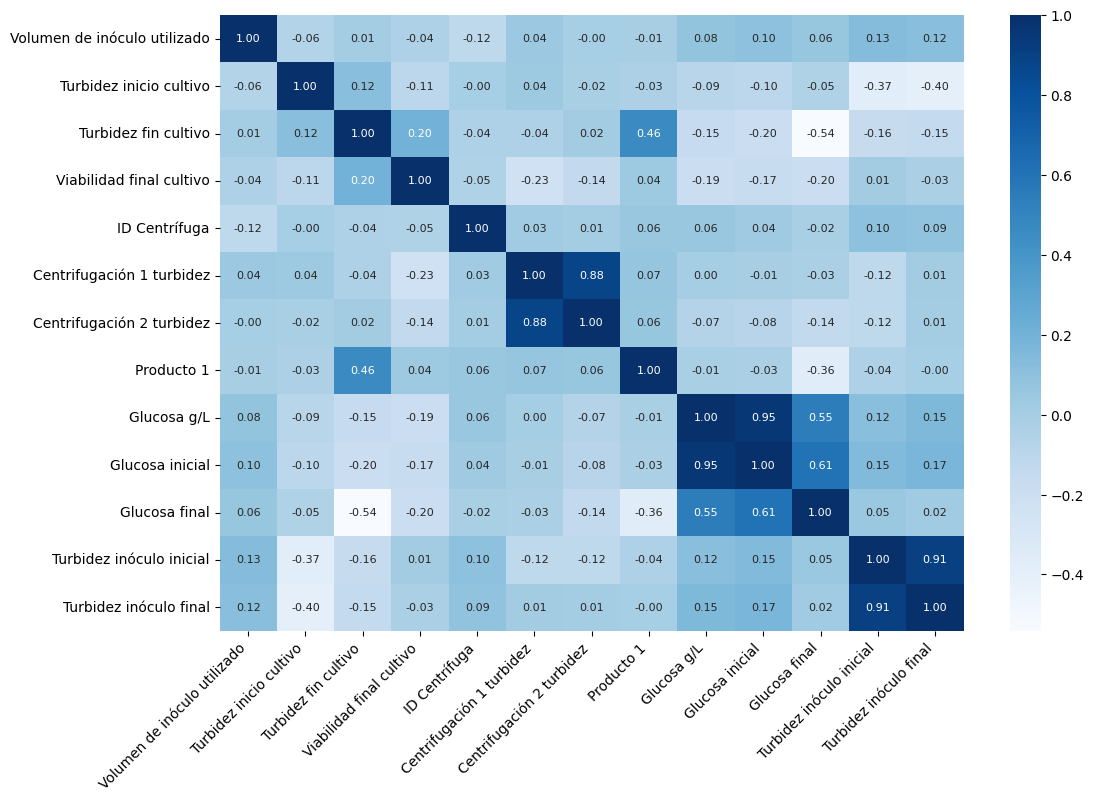

In [212]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Generar el heatmap
sns.heatmap(df_prod_fin_cin_fin_cin_ino.corr(), annot=True, annot_kws={"size": 8}, fmt=".2f", cmap="Blues")

# Rotar las etiquetas del eje X para que no se sobrepongan
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.show()